In [1]:
!pip install mglearn

     |████████████████████████████████| 540 kB 4.8 MB/s 
  Created wheel for mglearn: filename=mglearn-0.1.9-py2.py3-none-any.whl size=582639 sha256=1657ee8fcc08783160f2fe3773d461dc57923299caf893044fc3ec9c012bc613
  Stored in directory: /root/.cache/pip/wheels/f1/17/e1/1720d6dcd70187b6b6c3750cb3508798f2b1d57c9d3214b08b
Successfully built mglearn


In [2]:
import mglearn
import matplotlib.pyplot as plt

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


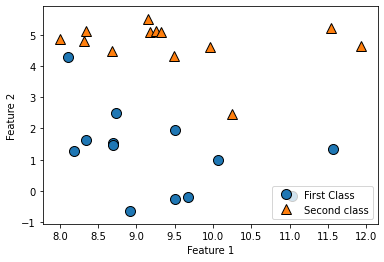

In [5]:
X, y = mglearn.datasets.make_forge()

mglearn.discrete_scatter(X[:,0], X[:,1], y)
plt.legend(['First Class', 'Second class'], loc=4)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


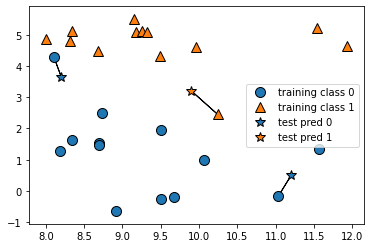

In [6]:
mglearn.plots.plot_knn_classification(n_neighbors=1)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


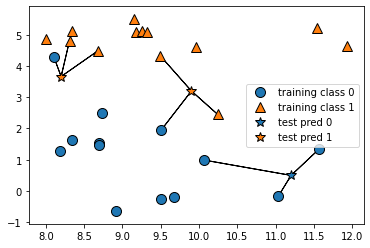

In [7]:
mglearn.plots.plot_knn_classification(n_neighbors=3)

In [8]:
from sklearn.model_selection import train_test_split

X,y = mglearn.datasets.make_forge()
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=0)

print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(19, 2) (7, 2)
(19,) (7,)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


In [9]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print(y_test)
print(y_pred)

[1 0 1 0 1 1 0]
[1 0 1 0 1 0 0]


In [10]:
clf.score(X_test, y_test)

0.8571428571428571

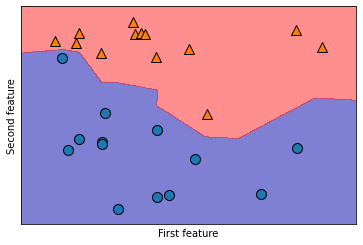

In [11]:
clf = KNeighborsClassifier(n_neighbors=1).fit(X,y)
mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, alpha=0.5)
mglearn.discrete_scatter(X[:,0], X[:,1], y)
plt.xlabel('First feature')
plt.ylabel('Second feature')
plt.show()

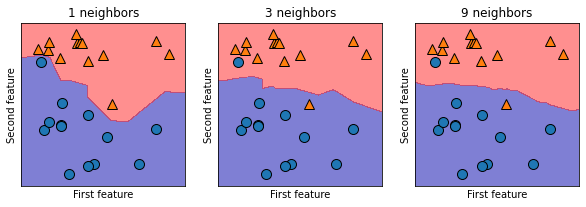

In [12]:
fig, axes = plt.subplots(1,3,figsize=(10,3))

for n_neighbors, ax in zip([1,3,9], axes):
  clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X,y)
  mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=0.5)
  mglearn.discrete_scatter(X[:,0], X[:,1], y, ax=ax)
  ax.set_title('{} neighbors'.format(n_neighbors))
  ax.set_xlabel('First feature')
  ax.set_ylabel('Second feature')

In [17]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

In [18]:
cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [19]:
cancer.data.shape

(569, 30)

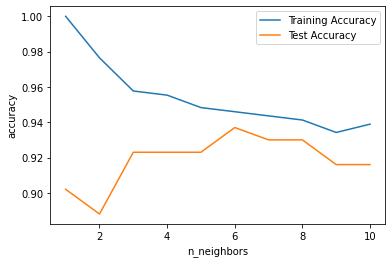

In [20]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=66)

iterations = []
training_accuracy = []
test_accuracy = []
for n_neighbors in range (1,11):
  clf = KNeighborsClassifier(n_neighbors=n_neighbors)
  clf.fit(X_train, y_train)
  training_accuracy.append(clf.score(X_train, y_train))
  test_accuracy.append(clf.score(X_test, y_test))
  iterations.append(n_neighbors)

plt.plot(iterations, training_accuracy, label='Training Accuracy')
plt.plot(iterations, test_accuracy, label='Test Accuracy')
plt.xlabel('n_neighbors')
plt.ylabel('accuracy')
plt.legend()
plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


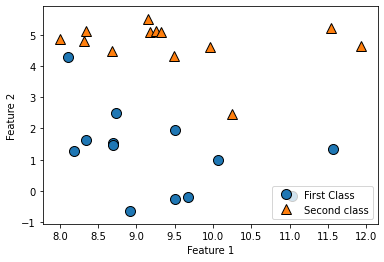

In [21]:
X, y = mglearn.datasets.make_forge()

mglearn.discrete_scatter(X[:,0], X[:,1], y)
plt.legend(['First Class', 'Second class'], loc=4)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

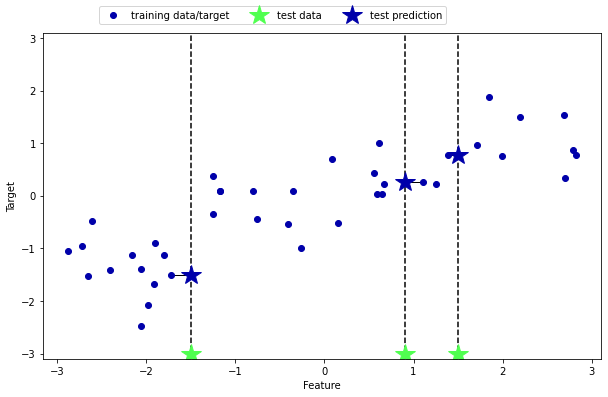

In [22]:
X, y = mglearn.datasets.make_wave(n_samples=40)
mglearn.plots.plot_knn_regression(n_neighbors=1)

In [24]:
X, y = mglearn.datasets.make_wave(n_samples=40)

from sklearn.neighbors import KNeighborsRegressor
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
reg = KNeighborsRegressor(n_neighbors=3)
reg.fit(X_train, y_train)

reg.score(X_test, y_test)

0.8344172446249605

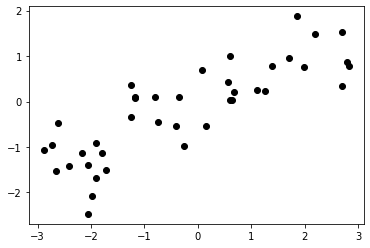

In [25]:
plt.plot(X,y,'ko')
plt.show()

In [26]:
import numpy as np

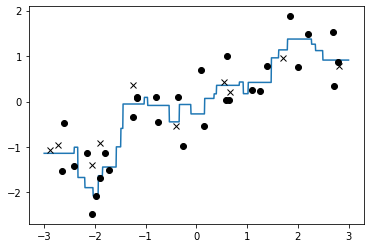

In [27]:
line = np.linspace(-3,3,1000).reshape(-1,1)

reg = KNeighborsRegressor(n_neighbors=3)
reg.fit(X_train, y_train)
plt.plot(line, reg.predict(line), label='KNN')
plt.plot(X_train, y_train, 'ko', label='Training')
plt.plot(X_test, y_test, 'kx', label='Test')
plt.show()

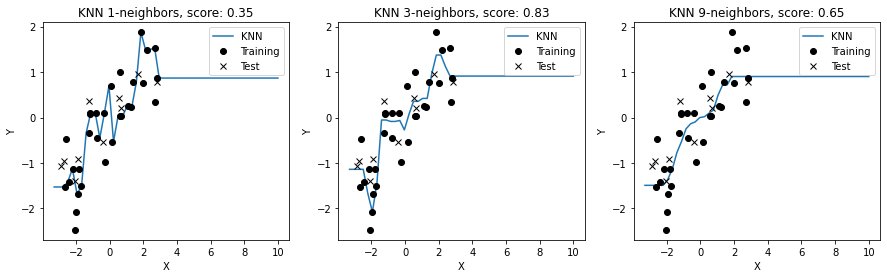

In [29]:
fig, axes = plt.subplots(1,3,figsize=(15,4))
line = np.linspace(-3.3,10).reshape(-1,1)
for n_neighbors, ax in zip([1,3,9], axes):
  reg = KNeighborsRegressor(n_neighbors=n_neighbors)
  reg.fit(X_train, y_train)
  ax.plot(line, reg.predict(line), label='KNN')
  ax.plot(X_train, y_train, 'ko', label='Training')
  ax.plot(X_test, y_test, 'kx', label='Test')
  ax.set_title('KNN {}-neighbors, score: {:.2f}'.format(n_neighbors, reg.score(X_test, y_test)))
  ax.set_xlabel("X")
  ax.set_ylabel("Y")
  ax.legend()